# Question 1

In this question we will:

- Define the CNN architecture as a Keras model object
- Load training and validation datasets using Keras ImageDataGenerator objects
- Train our CNN
- Save the model for later retrieval.
- Visualize the training and validation loss and accuracy over the training epochs.
- Evaluate the performance of our model on a test dataset.

# Step 0: Import Libraries

Import all the required Tensorflow and Keras libraries

In [5]:
# These are all the imports we will need.  You shouldn't need anything else.
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers 

import os as os
import numpy as np
import matplotlib.pyplot as plt

# Dataset sizes
num_train_images = 23000
num_validation_images = 2000
num_test_images = 399

# Model Hyperparameters
input_image_size = 64
batch_size = 32
num_training_epochs = 40
learning_rate = 0.001
l2_lambda = 0.01

# Parameters derived from hyperparameters
training_steps_per_epoch = int(num_train_images/batch_size)
validation_steps_per_epoch = int(num_validation_images/batch_size)
testing_steps_per_epoch = num_test_images/batch_size

%matplotlib inline

 # Step 1: Design the CNN architecture. After designing the architecture, print it in iPython Notebook. 


In [6]:
# WRITE THE CODE DEFINING THE NETWORK ARCHITECTURE HERE (Sec. 2.2 in the assignment PDF)

# Initialize the CNN using the Sequential() function from keras.models and assign it to the variable 'model'.
model = Sequential()

# Add a convolution layer with 8 feature maps of shape (3,3), and input_shape=(64,64,3).
# Use 'relu' for the activation function.

model.add(Conv2D(8 , (3,3) , input_shape = (64,64,3) , activation = 'relu') )

# Add a max pooling layer, with a pool_size of (2,2)

model.add(MaxPooling2D(pool_size = (2,2)))

# Add a three more pairs of convolution and max pooling layers.  Use 32, 64, and 128 feature maps, respectively,
# for each successive convolutional layer.  Use pool_size of (2,2) for every max pooling lyaer.
# Don't specify input_shape for the convolutional layer this time since it can be inferred from the previous layer.

model.add(Conv2D(32, (3,3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a flattening layer.

model.add(Flatten())


# Add a fully connected layer with 128 units and the RELU activation function. This
# will be a hidden layer.  Use the L2 kernel regularizer with a lambda of l2_lambda (defined above).

model.add(Dense(units = 128 , activation = 'relu' , kernel_regularizer = regularizers.l2(l2_lambda)))

# Add a fully connected layer with 1 unit and the sigmoid activation function.  This
# will be the output layer.

model.add(Dense(units = 1 , activation = 'sigmoid' , kernel_regularizer = regularizers.l2(l2_lambda)))

# Create an Adam optimizer object with learning rate equal to learning_rate (defined above);
# call Adam() with the parameter lr=learning_rate and assign it to the variable 'opt'.

opt = Adam(learning_rate=learning_rate)


# Compile the CNN using the compile() method.  Use the 'adam' optimizer (optimizer=opt), and the 
# 'binary_crossentropy' loss function.  Use the parameter metrics=['accuracy'].  

model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

#Print a Summary of the Architecture using the summary() method.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

2024-11-28 22:29:06.696906: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Step 2: Load Images and Prepare the Network for training

In [7]:
# Instantiate ImageDataGenerator objects for the training and validation sets, and load the datasets with the flow_from_directory() method.

# Create the ImageDataGenerator() for the training data.  
# We want to re-scale the image pixel data to the range 0.0 to 1.0 by dividing by 255.0.  
# Also We want to use real-time data augmentation allowing horizontal flips, 
# and a modest amount of zooming and shearing. 
# Thus, use the paramters rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True.

train_datagen = image.ImageDataGenerator(rescale = 1.0/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)


# Create the ImageDataGenerator() for the validation data.  It doesn't need any data augmentation,
# only the scaling of the image pixel data, so omit everything but the rescale parameter.

validation_datagen = image.ImageDataGenerator(rescale = 1.0/255)


# Load the training set using train_datagen.flow_from_directory().  Use
# target_size = (input_image_size, input_image_size), batch_size=batch_size, and class_mode = 'binary'.

training_set = train_datagen.flow_from_directory("./train",
                                                 target_size = (input_image_size, input_image_size), 
                                                 batch_size=batch_size, class_mode = 'binary')


# Load the validation dataset using validation_datagen.flow_from_directory(). 
# Use the same parameters as above.

validation_set = validation_datagen.flow_from_directory("./valid",
                                                 target_size = (input_image_size, input_image_size), 
                                                 batch_size=batch_size, class_mode = 'binary')



Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Step 3: Train the CNN Network

In [8]:
# Train the CNN using the fit() function of your CNN.  The first arguments hould be your training set generator from step 2.
#
# Use steps_per_epoch=training_steps_per_epoch, epochs=num_training_epochs, validation_data=validation_set,
# and validation_steps=validation_steps_per_epoch, and verbose=1.
#
# training_steps_per_epoch defined above as num_training_images / batch_size.  Since each step will process
# batch_size images, this number of steps will run through the training set exactly once per eopch.  
# This calculation results in steps_per_epoch = num_training_images / batch_size = 718 batches to make one pass through the training set.
# This is, of course, done num_training_epochs times.
#
# Similarly, validation_steps_per_epoch is defined as num_validation_images / batch_size.  Again, this causes
# one validation pass to run through the validation set exactly once.  
# This calculation results in validation_steps = 2000/32 = 63 batches to make one pass through the validation set.

# You should see the loss function and the accuracy improving quite a bit after each of the 
# first few epochs.  Then it should slow down.  If you allow it to run for more than 40 epochs 
# you probably won't see much additional improvement (for me, after 55 epochs it was no better 
# than it was after 40 epochs).

# Expect a pause at the end of each epoch as it classifies images from the validation set.  The validation accuracy 
# should track the training accuracy fairly well.

# This will take a while - maybe up to 2-3 hours depending on your CPU.  On my computer (which is an M2 Macbook pro)
# it took about 40-45s seconds per epoch training on the CPU (not GPU).   

history = model.fit(
    training_set, steps_per_epoch=training_steps_per_epoch, 
    epochs=num_training_epochs, validation_data=validation_set,
    validation_steps=validation_steps_per_epoch, verbose=1 )



Epoch 1/40
718/718 [==============================] - 56s 77ms/step - loss: 0.7526 - accuracy: 0.5930 - val_loss: 0.6669 - val_accuracy: 0.6089
Epoch 2/40
718/718 [==============================] - 56s 77ms/step - loss: 0.6261 - accuracy: 0.6611 - val_loss: 0.6118 - val_accuracy: 0.6769
Epoch 3/40
718/718 [==============================] - 56s 77ms/step - loss: 0.5697 - accuracy: 0.7140 - val_loss: 0.5474 - val_accuracy: 0.7298
Epoch 4/40
718/718 [==============================] - 56s 78ms/step - loss: 0.5254 - accuracy: 0.7490 - val_loss: 0.5130 - val_accuracy: 0.7495
Epoch 5/40
718/718 [==============================] - 55s 77ms/step - loss: 0.4831 - accuracy: 0.7770 - val_loss: 0.4695 - val_accuracy: 0.7918
Epoch 6/40
718/718 [==============================] - 55s 77ms/step - loss: 0.4496 - accuracy: 0.7967 - val_loss: 0.4897 - val_accuracy: 0.7661
Epoch 7/40
718/718 [==============================] - 55s 77ms/step - loss: 0.4247 - accuracy: 0.8113 - val_loss: 0.4111 - val_accuracy:

# Step 4: Save the model and weights for prediction

In [9]:
# Save the model using the save() method of the CNN model.

# You don't have to code anything here except to change the filename to something suitable for you
# and then run this block.

model.save('Cat-Dog-Classifier.h5')
print("Saved model to disk")

Saved model to disk


# Step 5: Plot the training and Validation Loss/Accuracy

{'loss': [0.752641499042511, 0.6260794401168823, 0.5696632862091064, 0.5253786444664001, 0.4831232726573944, 0.4496478736400604, 0.4247027635574341, 0.40744268894195557, 0.39359936118125916, 0.37933287024497986, 0.36573103070259094, 0.35157841444015503, 0.3372111916542053, 0.32890647649765015, 0.3233090341091156, 0.3167785406112671, 0.3051576316356659, 0.2954157888889313, 0.2935695946216583, 0.28455987572669983, 0.27969691157341003, 0.2711978852748871, 0.2617895007133484, 0.26060518622398376, 0.2544249892234802, 0.24995233118534088, 0.24807077646255493, 0.24448293447494507, 0.2376995086669922, 0.23125576972961426, 0.22688838839530945, 0.22629769146442413, 0.22025291621685028, 0.21484331786632538, 0.21259984374046326, 0.20646904408931732, 0.21008814871311188, 0.19906318187713623, 0.19912338256835938, 0.19190867245197296], 'accuracy': [0.5930424928665161, 0.6611372232437134, 0.7140369415283203, 0.7489985823631287, 0.7769505381584167, 0.7966736555099487, 0.8113462328910828, 0.823624193668

Text(0, 0.5, 'Loss')

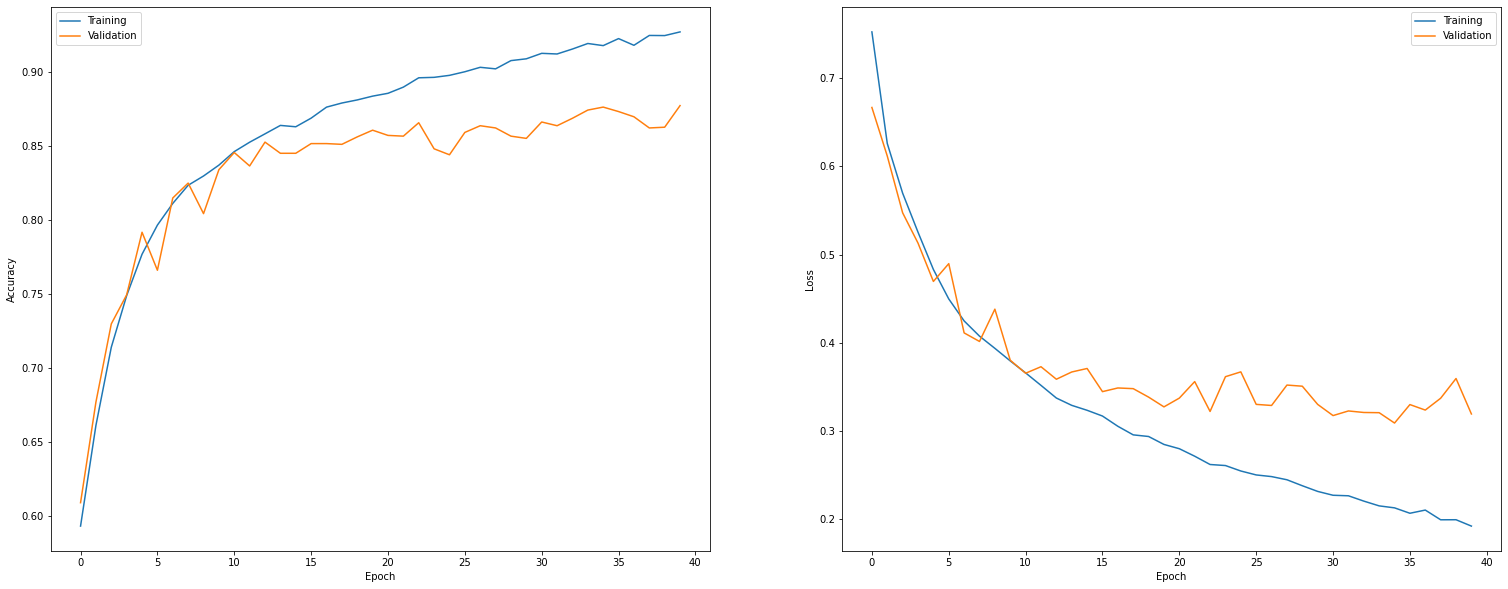

In [12]:
# Use the history of the training and validation accuracy and loss 
# from the history object returned by model.fit_generator().  Plot
# two graphs as described in section 3.6 of the assignment PDF.  
#
# e.g. history.history['accuracy'] is an array of the training accuracy for each epoch,
print(history.history)
import matplotlib.pyplot as plt

plt.subplots(1,2,figsize=(26, 10))

plt.subplot(1,2,1)
x =  np.arange(0, num_training_epochs, step=1 )
plt.plot(x,history.history['accuracy'] )
plt.plot(x,history.history['val_accuracy'] )
plt.legend(["Training","Validation"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(x,history.history['loss'] )
plt.plot(x,history.history['val_loss'] )
plt.legend(["Training","Validation"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Interpreting the Graphs

Answer the following questions directly in this block (if you can't produce the graphs yourself, answer based on the sample outputs in the assignment PDF):

1. The graphs suggest there may be a problem with our network.  What is it?

[Answer here] The problem with the network is overfitting. Overfitting occurs when the model performs exceptionally well on the training data but fails to generalize to unseen data, as indicated by the validation metrics. In this case, the training accuracy continues to improve consistently, reaching 92.73% by epoch 40, while the validation accuracy stops improving after epoch 25, fluctuating around 86.59% to 87.75%. Similarly, the training loss decreases steadily from 0.75 at epoch 1 to 0.19 at epoch 40, but the validation loss starts increasing slightly after epoch 25. These trends indicate that the model is learning patterns specific to the training data, rather than capturing features that would generalize well to the validation data.


2. What is it about the graphs that tells you that this is a problem?

[Answer here]At epoch 25, the training accuracy reaches 90.03%, and the validation accuracy peaks at 86.59%. However, beyond this point, the validation accuracy begins to fluctuate, and the gap between training and validation accuracy widens. Similarly, the validation loss reaches a low of 0.32 around epoch 25 but begins to increase thereafter, reaching 0.36 at epoch 40. This divergence between training and validation metrics is a key indicator of overfitting, as the model continues to optimize for the training data while losing its ability to perform well on unseen validation data.

3. Based on the graphs, at what epoch could we likely stop training and still expect about the same performance on a test dataset?

[Answer here]The optimal point to stop training would be around epoch 23 to 25. At epoch 23, the validation accuracy is 86.59%, and the validation loss is 0.32, both of which represent some of the best validation metrics observed in the data. By epoch 25, the validation accuracy remains stable at 86.59%, and the validation loss stays near its minimum. Beyond this point, validation metrics either plateau or deteriorate, indicating no further improvement in generalization. Stopping training around epoch 23 to 25 would provide a model with a strong balance between training performance and generalization, ensuring it performs well on unseen test data.


# Step 6: Predict Doc/Cat using the Trained Model

In [13]:
# Start by loading your model from disk that you previously saved so you don't have to run through
# the rest of the notebook just to test the model.  Change the filename to the same filename you used in Step 4.
model = load_model('Cat-Dog-Classifier.h5')

# Now, create a data generator for the test images, just like for the training and validation sets.  

# We still want to rescale the intensities by dividing by 255 because pre-processing of test images must match
# the preprocessing of training and test images.  But we do not want any data augmentation so instantiate
# the ImageDataGenerator in the same way you did for the validation set.

# When calling flow_from_directory() we need class_mode = None, and shuffle = False so that we don't re-order the data.  
# Use the same target_size and batch_size as before.

test_datagen = image.ImageDataGenerator(rescale = 1.0/255)

generator = test_datagen.flow_from_directory("./test1",
                                                 target_size = (input_image_size, input_image_size), 
                                                 batch_size=batch_size, class_mode = None,
                                                shuffle=False
                                            )

# Now call model.predict_generator().
# The parameter to model.predict_generator() should be the 'generator' object, above.

probabilities = model.predict_generator( generator )

# take the 'probabilities' array, above, and convert to an array y_pred which is equal to 1 if 
# probabilities > .5, and 0 otherwise.  Also use np.squeeze() to remove the second dimension 
# of the array (which has length 1 and is not needed) so that y_pred has shape (499,), i.e. a 1-D array.  
# If you've done this right, your y_pred array should be exactly the same shape as generator.classes.
prob = np.squeeze(probabilities)
y_pred = np.zeros_like(prob, dtype=int)
y_pred[prob <= 0.5] = 0
y_pred[prob > 0.5] = 1

# print(y_pred)
# print(generator.classes)
# Compare y_pred to generator.classes, which are the correct class labels, and compute and print out the classification accuracy.
# You should expect a classification rate of around 85%.

accuracy = ( np.sum(y_pred == generator.classes)/len(generator.classes) )* 100
print('The classification rate is', accuracy)
                                        

Found 399 images belonging to 2 classes.


/var/folders/nh/9fsl45m17nn6q_xt_zd0wwbw0000gn/T/ipykernel_12895/3278948246.py:25: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator( generator )


The classification rate is 87.21804511278195
